In [67]:
import numpy as np

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [334]:
import sympy as sm
sm.init_printing(use_unicode=True)
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
sm.init_printing(use_unicode=True)


par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075
par['delta'] = 0.80
par['omega'] = 0.15
par['stoc_x'] = 3.492
par['stoc_c'] = 0.2

delta = par['delta']
omega = par['omega']

pi = sm.symbols("pi_t")
pi_minus1 = sm.symbols("pi_t-1")
alpha = sm.symbols("alpha")
gamma = sm.symbols("gamma")
phi = sm.symbols("phi")
h = sm.symbols("h")
b = sm.symbols("b")
v = sm.symbols("v_t")
y = sm.symbols("y_t")
y_minus1 = sm.symbols("y_t-1")
s= sm.symbols("s_t")
s_minus1 = sm.symbols("s_t-1")
x = sm.symbols("x")
c = sm.symbols("c")

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [335]:
#Question 1:

# a. We define the AD-curve as given in the introduction
AD = 1/(h*alpha)*(v-(1+b*alpha)*y) 

# b. We define the SRAS-curve as given in the introduction
SRAS = pi_minus1 + gamma*y - phi*gamma*y_minus1 + s - phi*s_minus1

# c. We set AD and SRAS equal to eachother. 
AD_equal_SRAS = sm.Eq(SRAS,AD)

# d. We calulate the steady-state value of the output in the model: 
steady_state_y = sm.solve(AD_equal_SRAS,y)

print("The optimal choice", y, "is:", steady_state_y)

The optimal choice y_t is: [(alpha*gamma*h*phi*y_t-1 + alpha*h*phi*s_t-1 - alpha*h*pi_t-1 - alpha*h*s_t + v_t)/(alpha*b + alpha*gamma*h + 1)]


In [336]:
# e. Since we now know the steady-state value for output, we can use this to find steady-state for inflation:
steady_state_pi = 1/(h*alpha)*(v-(1+b*alpha)*steady_state_y[0]) 

print("The optimal choice", pi, "is:", steady_state_pi)

The optimal choice pi_t is: (v_t - (alpha*b + 1)*(alpha*gamma*h*phi*y_t-1 + alpha*h*phi*s_t-1 - alpha*h*pi_t-1 - alpha*h*s_t + v_t)/(alpha*b + alpha*gamma*h + 1))/(alpha*h)


**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [337]:
#Question 2:

#a. We define the numerical solutions for y and pi. 
y_numerical_solution = sm.lambdify((v,alpha,b,gamma,h,phi,y_minus1,pi_minus1,s,s_minus1),steady_state_y[0])
pi_numerical_solution = sm.lambdify((v,alpha,b,gamma,h,phi,y_minus1,pi_minus1,s,s_minus1), steady_state_pi)


def y_solution_scenario1(v,y_minus1,pi_minus1,s,s_minus1):
    return y_numerical_solution(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y_minus1,pi_minus1,s,s_minus1)

def pi_solution_scenario1(v,y_minus1,pi_minus1,s,s_minus1):
    return pi_numerical_solution(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y_minus1,pi_minus1,s,s_minus1)


print("The optimal solution for output (y) in the scenario where the parameter values are set to 0, is:", y_solution_scenario1(v=0,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))
print("The optimal solution for inflation (pi) in the scenario where the parameter values are set to 0, is:", pi_solution_scenario1(v=0,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))


The optimal solution for output (y) in the scenario where the parameter values are set to 0, is: 0.0
The optimal solution for inflation (pi) in the scenario where the parameter values are set to 0, is: 0.0


In [338]:
#In the case for v = 0.1:
print("The optimal solution for output (y) in the scenario where the parameter values are set to 0, except v = 0.1, is:", y_solution_scenario1(v=0.1,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))
print("The optimal solution for inflation (pi) in the scenario where the parameter values are set to 0, except v = 0.1, is:", pi_solution_scenario1(v=0.1,y_minus1=0,pi_minus1=0,s=0,s_minus1=0))

The optimal solution for output (y) in the scenario where the parameter values are set to 0, except v = 0.1, is: 0.0244140625
The optimal solution for inflation (pi) in the scenario where the parameter values are set to 0, except v = 0.1, is: 0.001831054687500002


For the sake of illusatration, we can show how this looks by defining the functions numerically: 

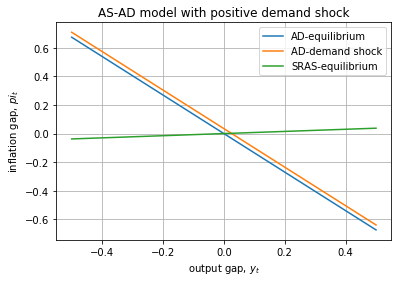

In [339]:
def AD_numerical_function(v,y):
    return 1/(par['h']*par['alpha'])*(v-(1+par['b']*par['alpha'])*y)

def SRAS_numerical_function(pi_minus1,s,s_minus1,y): 
    return pi_minus1 + par['gamma']*y-par['phi']*par['gamma']*y_minus1+s-par['phi']*s_minus1

#We define parameter values
pi_minus1 = 0 
s = 0 
s_minus1 = 0 
v = 0 
v_shock = 0.1
y = np.linspace(-0.5,0.5,100)

#We then define the functions we wish to show graphically:
AD_num_func = AD_numerical_function(v,y)
AD_with_shock = AD_numerical_function(v_shock,y)
SRAS_num_func = SRAS_numerical_function(pi_minus1,s,s_minus1,y)

#We can now create the plot and show the relationship between the three functions:
fig = plt.figure()
plt.axes()
ax = fig.add_subplot(1,1,1)
ax.plot(y, AD_num_func)
ax.plot(y, AD_with_shock)
ax.plot(y, SRAS_num_func)
ax.set_xlabel("output gap, $y_t$")
ax.set_ylabel("inflation gap, $pi_t$")
ax.set_title ("AS-AD model with positive demand shock")
ax.grid()
plt.legend(("AD-equilibrium","AD-demand shock","SRAS-equilibrium"))


**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [340]:
#Question 3:

#We define the autoregressive processes as functions:
def v_autoregressive(v_minus1,x):
    return par['delta']*v_minus1+x

def s_autoregressive(s_minus1,c):
    return par['omega']*s_minus1+c

# We then set the initial values:
T = 250
pi_vector = [0]
y_vector = [0]
s_vector = [0]
v_vector = [0]
c_vector = np.zeros(T)
x_vector = np.zeros(T)
x_vector[1] = 0.1

# We then start the simulation, and make sure that for each value in a period t, is appended to the vector list defined above:
for t in range(1,T):
    s_vector.append(s_autoregressive(s_vector[t-1],c_vector[t])) # We make sure the different autoregressive values are appeneded to the s_vector
    v_vector.append(v_autoregressive(v_vector[t-1],x_vector[t])) # We make sure the different autoregressive values are appeneded to the v_vector
    
    y_vector.append(y_solution_scenario1(v_vector[t],y_vector[t-1],pi_vector[t-1],s_vector[t],s_vector[t-1])) # We appened to output
    pi_vector.append(pi_solution_scenario1(v_vector[t],y_vector[t-1],pi_vector[t-1],s_vector[t],s_vector[t-1])) #We appened to inflation
    
    

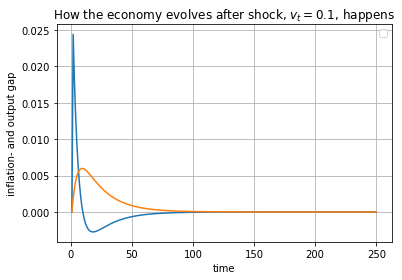

In [341]:
#We then build the plot:
timeline = np.linspace(1,T,T)

figure_time = plt.figure()
plt.axes()
ax = figure_time.add_subplot(1,1,1)
ax.plot(timeline, y_vector)
ax.plot(timeline, pi_vector)
ax.set_xlabel("time")
ax.set_ylabel("inflation- and output gap")
ax.set_title("How the economy evolves after shock, $v_t=0.1$, happens")
ax.grid()
plt.legend("Inflation", "Output")

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$



The **standard deviations of the shocks** are:

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [342]:
#Due to an issue with having defined many of the lagged variables as "sm.symbols(x_t-1)", we redefine the symbols as well as many of the functions from before:

pi = sm.symbols("pi")
gamma = par["gamma"]
phi = sm.symbols("phi")
y = sm.symbols("y")
y_lag = sm.symbols("y_lag")
pi_lag = sm.symbols("pi_lag")
s = sm.symbols("s")
s_lag = sm.symbols("s_lag")
alpha = par["alpha"]
h = par["h"]
b = par["b"]
v = sm.symbols("v")

In [343]:
#We also redefine the AD and SRAS curve due to the redefined variables above:
AD = (1/(h*alpha))*(v-(1+(b*alpha))*y)
SRAS = pi_lag+gamma*y-phi*gamma*y_lag+s-phi*s_lag

In [344]:
#We now solve the equations as we did previously:
AD_equal_SRAS = sm.Eq(AD,SRAS)
y_final = sm.solve(equation_y,y)[0]
print("Output gap is period t is:", y_final)

pi_solve= sm.Eq(pi,SRAS)
pi_final = sm.solve(pi_solve, pi)[0]
print("Inflation gap in period t is:", pi_final)

Output gap is period t is: 0.703125*phi*s_lag + 0.052734375*phi*y_lag - 0.703125*pi_lag - 0.703125*s + 0.244140625*v
Inflation gap in period t is: -phi*s_lag - 0.075*phi*y_lag + pi_lag + s + 0.075*y


In [345]:
y_lambdified = sm.lambdify((pi_lag, s, v, phi, s_lag, y_lag), y_final)
pi_lambdified = sm.lambdify((pi_lag, s, y, phi, s_lag, y_lag), pi_final)

In [346]:
def simulate(stoc_x, stoc_c, phi):
    #Range to simulate over
    t = range(0, 1000, 1)
    
    #Seed - need this in order to use the function over multiple samples for changed parameters
    np.random.seed(32)
    #Demand shocks    
    x = [np.random.normal(0, stoc_x) for i in t]
    
    #Supply shocks
    c = [np.random.normal(0, stoc_c) for i in t]
    
    # Demand and supply disturbances
    v = [delta*0+x[0]] #initialisation of v_0
    s = [omega*0+c[0]] # initialisation of s_0

    # Get full list of v and s for all 1000 periods.
    for i in range(1, max(t)+1):
        v.append(delta*v[i-1]+x[i])
        s.append(omega*s[i-1]+c[i])
        
    output = [0] #initialisation of output gap
    inflation = [0] #initialisation of inflation gap

    # Get full list of output and inflation for all 1000 periods.
    for i, j, k in zip(v, s, range(0, 999)):
        output.append(y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]))
        inflation.append(pi_lambdified(pi_lag = inflation[k], s = j,
                                    y = y_lambdified(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]),
                                    phi = phi, s_lag = s[k], y_lag = output[k]))
     
    # Define autocorrelation function
    def autocorr(x, t=1):
        return np.corrcoef(np.array([x[:-t], x[t:]]))
    
    # Calculate the relevant statistics
    var_output = np.var(output)
    var_inflation = np.var(inflation)
    corr_output_inflation = np.corrcoef(output, inflation)[1][0]
    acf_output = autocorr(output)[1][0]
    acf_inflation = autocorr(inflation)[1][0]
    
    # Return the output, inflation and the calculated statistics
    return output, inflation, var_output, var_inflation, corr_output_inflation, acf_output, acf_inflation

In [347]:
output = simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[0]
inflation = simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[1]

# Create a list with periods. This is used as the x-axis
t = range(0, 1000, 1)

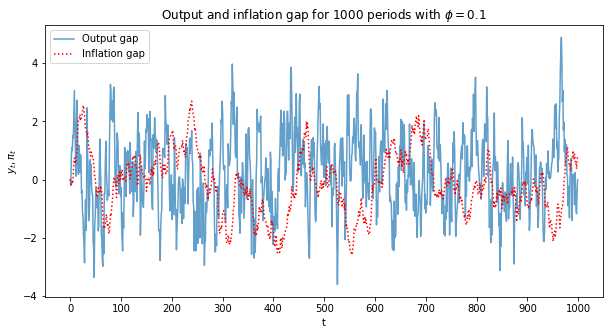

In [348]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(t, output, label = 'Output gap', alpha=0.7)
ax.plot(t, inflation, linestyle= ':', label = 'Inflation gap', color='red')
#ax.grid() 
ax.legend()
ax.set_xlabel('t') # 
ax.set_ylabel('$y_t, \pi_t$')
ax.set_title('Output and inflation gap for 1000 periods with $\phi=0.1$')
plt.xticks(range(0, 1001, 100))
plt.show()

In [349]:
print("Output variance:" + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[2], 4)))
print("Inflation variance:" + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[3], 4)))
print("Correlation between output and inflation:" + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[4],4)))
print("Output auto-correlation: " + str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[5], 4)))
print("Inflation auto-correlation: "+ str(round(simulate(stoc_x=3.492, stoc_c=0.2, phi = 0.1)[6], 4)))

Variance of output: 1.767
Variance of inflation: 1.1469
Correlation between output and inflation: -0.1771
Auto-correlation output: 0.7611
Auto-correlation inflation: 0.9841


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [363]:
# retrive the correlation output
corr_output_inflation = [] #container for correlation output
phi_range = np.linspace(0,1,21) #20 steps in the range of 0 to 1 for phi

for i in phi_range:
    corr_output_inflation.append(simulate(stoc_x = 3.492, stoc_c = 0.2, phi = i)[4])
    

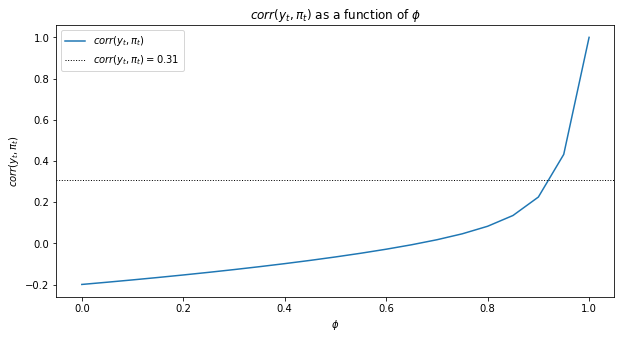

In [366]:
# plot the results
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(phi_range, corr_output_inflation, label = "$corr(y_t,\pi_t)$", alpha=1.0)
#ax.grid() 
ax.legend()
ax.set_xlabel("$\phi$")  
ax.set_ylabel("$corr(y_t,\pi_t)$")
ax.set_title("$corr(y_t,\pi_t)$ as a function of $\phi$")
#plt.xticks(range(0, , 10))
plt.axhline(y=0.31, color = 'black', linewidth = 1, linestyle =':', label = "$corr(y_t,\pi_t)=0.31$")
plt.legend()
plt.show()

In [355]:
def simulate_corr(phi, stoc_x=3.492, stoc_c=0.2, target = 0.31):
    #Range to simulate over
    t = range(0, 1000, 1)
    
    #Seed - need this in order to use the function over multiple samples for changed parameters
    np.random.seed(32)
    #Demand shocks    
    x = [np.random.normal(0, stoc_x) for i in t]
    
    #Supply shocks
    c = [np.random.normal(0, stoc_c) for i in t]
    
    # Demand and supply disturbances
    v = [delta*0+x[0]] #initialisation of v_0
    s = [omega*0+c[0]] # initialisation of s_0

    for i in range(1, max(t)+1):
        v.append(delta*v[i-1]+x[i])
        s.append(omega*s[i-1]+c[i])
        
    output = [0]
    inflation = [0]

    for i, j, k in zip(v, s, range(0, 999)):
        output.append(y_eq_func(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]))
        inflation.append(pi_eq_func(pi_lag = inflation[k], s = j,
                                    y =y_eq_func(pi_lag = inflation[k], s = j, v = i, phi = phi, s_lag = s[k], y_lag = output[k]),
                                    phi = phi, s_lag = s[k], y_lag = output[k]))
    # Define autocorrelation   
    def autocorr(x, t=1):
        return np.corrcoef(np.array([x[:-t], x[t:]]))
    
    corr_output_inflation = np.corrcoef(output, inflation)[1][0]
    diff_corr_target = (corr_output_inflation - target)**2 #squared difference

    
    return diff_corr_target

In [356]:
x = lambda phi: simulate_corr(phi) #objective function
phi_opt = optimize.minimize_scalar(x, method='bounded', bounds=[0,1]) #bounded scalar minimizer

In [357]:
print('If phi is ' + str(phi_opt.x) + ' then:')
print('Correlation between output and inflation: '+ str(simulate(stoc_x=3.492, stoc_c=0.2, phi = phi_opt.x)[4]))

If phi is 0.9269193789605168 then:
Correlation between output and inflation: 0.3100015824294274


Thus we find phi to be equal to 0,93 and the correlation between inflation and output to be equal to 0,31 as we wanted.

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

In [358]:
def simulate_full(vector):
    #Takes in a vector with: (phi, stoc_x, stoc_c)
    
    #Range to simulate over
    t = range(0, 1000, 1)
    
    #Seed - need this in order to use the function over multiple samples for changed parameters
    np.random.seed(32)
    #Demand shocks    
    x = [np.random.normal(0, vector[1]) for i in t]
    
    #Supply shocks
    c = [np.random.normal(0, vector[2]) for i in t]
    
    # Demand and supply disturbances
    v = [delta*0+x[0]] #initialisation of v_0
    s = [omega*0+c[0]] # initialisation of s_0

    for i in range(1, max(t)+1):
        v.append(delta*v[i-1]+x[i])
        s.append(omega*s[i-1]+c[i])
        
    output = [0]
    inflation = [0]

    for i, j, k in zip(v, s, range(0, 999)):
        output.append(y_eq_func(pi_lag = inflation[k], s = j, v = i, phi = vector[0], s_lag = s[k], y_lag = output[k]))
        inflation.append(pi_eq_func(pi_lag = inflation[k], s = j,
                                    y =y_eq_func(pi_lag = inflation[k], s = j, v = i, phi = vector[0], s_lag = s[k], y_lag = output[k]),
                                    phi = vector[0], s_lag = s[k], y_lag = output[k]))
    # Define autocorrelation    
    def autocorr(x, t=1):
        return np.corrcoef(np.array([x[:-t], x[t:]]))
    
    #Summary stats
    var_output = np.var(output)
    var_inflation = np.var(inflation)
    corr_output_inflation = np.corrcoef(output, inflation)[1][0]
    acf_output = autocorr(output)[1][0]
    acf_inflation = autocorr(inflation)[1][0]
    
    #Targets
    targets = [1.64, 0.21, 0.31, 0.84, 0.48]
    
    #Squared differences
    diff_output = (var_output - targets[0])**2
    diff_inflation = (var_inflation - targets[1])**2
    diff_corr_target = (corr_output_inflation - targets[2])**2 #squared difference
    diff_acf_output = (acf_output - targets[3])**2
    diff_acf_inflation = (acf_inflation - targets[4])**2
    
    #Sum of squared differences
    diff_sumsq = sum([diff_output, diff_inflation, diff_corr_target, diff_acf_output, diff_acf_inflation])
    
    return diff_sumsq

In [359]:
x = lambda test: simulate_full(test) #objective function
guess = (0.92, 3.492, 0.2) # initial guess
targets = [1.64, 0.21, 0.31, 0.84, 0.48] # for printing

# define bounds
phi_bounds = (0,1) 
stoc_x_bounds = (0,100) #100 aribitrarily chosen
stoc_c_bounds = (0,100) #100 arbitrarily chosen
bounds = (phi_bounds, stoc_x_bounds, stoc_c_bounds)

In [360]:
vector_opt = optimize.minimize(x, x0 = guess, method="Nelder-Mead", bounds=bounds, options={'maxiter': 30000}) #bounded minimizer
vector_opt.x

array([0.97849465, 3.30823693, 0.46552524])

After using different methods to solve to minimization problem, we got the same result for several different methods, which were:

- $\phi=0.978$
- $\sigma_x=3.308$
- $\sigma_c=0.466$

Using these results we get the following outputs for variance, correlation and auto-correlation:

In [361]:
print('Variance of output: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[2]) +
      ' with a target of: ' + str(targets[0]))
print('Variance of inflation: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[3]) +
      ' with a target of: ' + str(targets[1]))
print('Correlation between output and inflation: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[4]) + 
      ' with a target of: ' + str(targets[2]))
print('Auto-correlation output: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[5]) + 
      ' with a target of: ' + str(targets[3]))
print('Auto-correlation inflation: '+ str(simulate(stoc_x=vector_opt.x[1], stoc_c=vector_opt.x[2], phi=vector_opt.x[0])[6]) + 
      ' with a target of: ' + str(targets[4]))

Variance of output: 1.6447282887219938 with a target of: 1.64
Variance of inflation: 0.0480846209128435 with a target of: 0.21
Correlation between output and inflation: 0.3492901784822388 with a target of: 0.31
Auto-correlation output: 0.7855961151838566 with a target of: 0.84
Auto-correlation inflation: 0.9590746593410826 with a target of: 0.48


We can then compare our results to those we wished to emulate, and we see that we get exactly the same results.

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [7]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?